In [1]:
from matplotlib import pyplot as plt
import Functions_data_analysis as fda
import Functions_plotting as fp
import numpy as np
from matplotlib import colors
import matplotlib.path as mpath
import cartopy.crs as ccrs

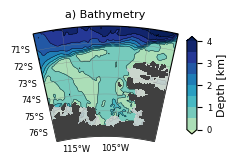

In [7]:
# Plot bathymetry

# set up metadata
fs = 8
plot_region = 'AS_near'
title = 'a) Bathymetry'

# Set up plot
fig = plt.figure()
fig.set_size_inches((2.5,1.5))

# specify domain
lat1,lat2,lon1,lon2 = fda.plot_regions[plot_region]
lon_mid = (lon1+lon2)/2
grid_proj = ccrs.PlateCarree()
ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo(central_longitude=lon_mid)) 

# get bathymtery and ice ds
land_ice_ds = flo.get_bathymetry_and_troughs()
land_ice_ds = land_ice_ds.sel(lat=slice(lat1,lat2),lon=slice(lon1,lon2))
lons, lats = land_ice_ds.lon, land_ice_ds.lat

# Plot bathymetry 
blevs = np.arange(0,4.25,0.5)
cmap_bupu = plt.get_cmap('YlGnBu')#BuPu
new_cmap = colors.ListedColormap(cmap_bupu(np.linspace(0.25, 1, 256)))
cf = ax.contourf(lons,lats,land_ice_ds.bathy/1000,blevs,transform=grid_proj,cmap=new_cmap,extend='both')
ax.contour(lons, lats, land_ice_ds.bathy/1000, blevs, colors='k',transform=grid_proj,linewidths=0.3,zorder=1)

# Plot ice
ax.contourf(lons,lats,land_ice_ds.all_ice,transform=grid_proj,colors=['lightgray']*2,alpha=0.8,zorder=4)
ax.contourf(lons,lats,land_ice_ds.grounded_ice,transform=grid_proj,cmap='binary_r',zorder=4)

# Set shape of map to match shape of data
rect = mpath.Path([[lon1, lat2], [lon2, lat2],[lon2, lat1], 
                   [lon1, lat1], [lon1, lat2]]).interpolated(50)
proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)
ax.set_boundary(rect_in_target)
ax.set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
ax.set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())
gl = ax.gridlines(crs=ccrs.PlateCarree(), linestyle='-', linewidth=0.2,color='gray', 
                  xlocs=np.arange(-140,-60,5),
                  ylocs=np.arange(-76,-60,1),draw_labels=False,\
                  x_inline=False,y_inline=False,rotate_labels=False)
gl.left_labels = True
gl.bottom_labels=True
gl.top_labels=False
gl.right_labels=False
gl.xlabel_style = {'size': 6}
gl.ylabel_style = {'size': 6}

# add colorbar
cb_ax = fig.add_axes([0.8,0.13,0.04,0.65])
cb_em = fig.colorbar(cf, cax=cb_ax, extend='both',orientation = 'vertical')  
cb_em.set_label(label = 'Depth [km]', fontsize=8)
cb_em.ax.tick_params(labelsize=6)
cb_em.set_ticks(blevs[0::2])

ax.set_title(title, fontsize=8)

fig.subplots_adjust(left=0.1,right=0.85,top=0.85,bottom=0.08,wspace=0.1,hspace=.05)
# plt.savefig('Plots/Figure_1a_bathy_simple.png',dpi=400)